## Model Training

### Import required Packages

In [2]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

#### Load the Student Performance Dataset

In [3]:
dataset = pd.read_csv("./data/stud.csv")
# Print first 5 rows
dataset.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Prapare Depedent(Target) & Indepedent Variables

In [7]:
X = dataset.drop(columns=['math_score'], axis=1)
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


#### Find classes from categorical columns

In [13]:
categorical_columns = X.select_dtypes(include='object').columns
for column in categorical_columns:
    print("# ---------------------------------------------------------------------------------------------------")
    print("Categories in '{column}' variable   : ", end = " ")
    print(X[column].unique())
    print("# ---------------------------------------------------------------------------------------------------")

# ---------------------------------------------------------------------------------------------------
Categories in '{column}' variable   :  ['female' 'male']
# ---------------------------------------------------------------------------------------------------
# ---------------------------------------------------------------------------------------------------
Categories in '{column}' variable   :  ['group B' 'group C' 'group A' 'group D' 'group E']
# ---------------------------------------------------------------------------------------------------
# ---------------------------------------------------------------------------------------------------
Categories in '{column}' variable   :  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
# ---------------------------------------------------------------------------------------------------
# -----------------------------------------------------------------------------------------

#### Depedent Variable

In [14]:
y = dataset['math_score']
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math_score, dtype: int64

#### Create Columns to Transforner with 3 transformation method

In [21]:
numerical_columns = X.select_dtypes(include='number').columns
categorical_columns = X.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

standard_transformer = StandardScaler()
ohe_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", ohe_transformer, categorical_columns),
         ("StandardScaler", standard_transformer, numerical_columns),        
    ]
)

In [22]:
X = preprocessor.fit_transform(X)

In [24]:
X.shape

(1000, 19)

#### Split Dataset into Training and Testing data

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=121)
X_train.shape, y_train.shape

((800, 19), (800,))

#### Create an Evaluate Function to give all metrics after model Training

In [28]:
def evaluate_model(actual, predicted):
    mae = mean_absolute_error(actual, predicted)
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    r2_square = r2_score(actual, predicted)

    return mae, rmse, r2_square

#### Train The Multiple Models and Evaluate Results

In [29]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('-'*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.2948
- Mean Absolute Error: 4.1885
- R2 Score: 0.8819
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.4719
- Mean Absolute Error: 4.4933
- R2 Score: 0.8490
-----------------------------------


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5428
- Mean Absolute Error: 5.1594
- R2 Score: 0.8197
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.6096
- Mean Absolute Error: 5.2171
- R2 Score: 0.7797
-----------------------------------


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.2950
- Mean Absolute Error: 4.1874
- R2 Score: 0.8819
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.4703
- Mean Absolute Error: 4.4908
- R2 Score: 0.8491
-----------------------------------




c:\Users\mshelke\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\mshelke\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.8171
- Mean Absolute Error: 4.5960
- R2 Score: 0.8574
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.6499
- Mean Absolute Error: 5.3570
- R2 Score: 0.7770
-----------------------------------


Decision Tree
Model performance for Training set
- Root Mean Squared Error: 0.4330
- Mean Absolute Error: 0.0325
- R2 Score: 0.9992
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 8.5484
- Mean Absolute Error: 6.6650
- R2 Score: 0.6315
-----------------------------------


Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 2.3485
- Mean Absolute Error: 1.8412
- R2 Score: 0.9768
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.0957
- Mean Absolute Error: 4.8362
- R2 Score: 0.8126
-----------------------------------


XGBRegressor
Model perfor

In [30]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,Ridge,0.849113
0,Linear Regression,0.849021
7,CatBoosting Regressor,0.829200
5,Random Forest Regressor,0.812639
6,XGBRegressor,0.805142
8,AdaBoost Regressor,0.797108
1,Lasso,0.779712
3,K-Neighbors Regressor,0.777022
4,Decision Tree,0.631530


## Train model using Linear Regression

In [31]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 84.90


#### Plot Actual Vs Predicted

Text(0.5, 1.0, 'ACTUAL Vs PREDICTED')

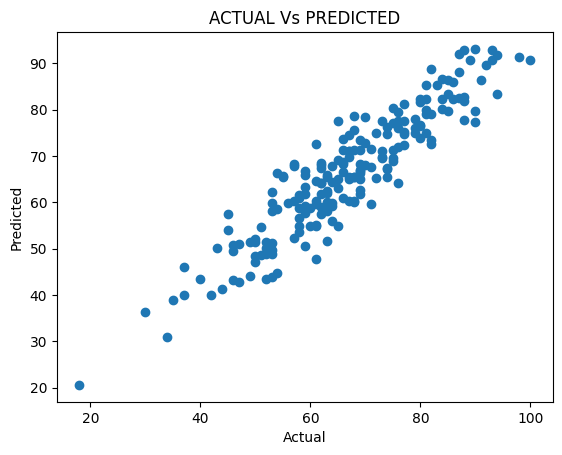

In [33]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');
plt.title("ACTUAL Vs PREDICTED")

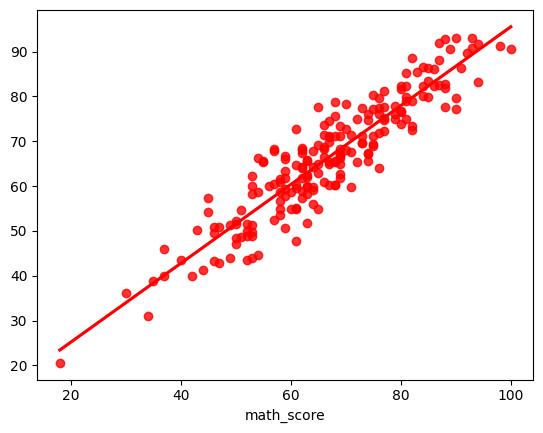

In [34]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

#### Difference between Actual and Predicted Values

In [35]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
380,80,76.463848,3.536152
288,88,77.689930,10.310070
328,82,79.030309,2.969691
208,74,67.353475,6.646525
284,37,40.039481,-3.039481
...,...,...,...
792,66,73.726480,-7.726480
343,67,71.143854,-4.143854
928,46,49.514938,-3.514938
467,72,65.285127,6.714873
